In [1]:
# Import libraries
import pandas as pd

In [2]:
# Read the titanic data
df = pd.read_csv('original.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get the descriptive stats of the numerical data except the non-useful PassengerId
df = df.drop(columns=['PassengerId'])
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
## Clean the data

# Convert the Sex column into binary values (0 = Male; 1 = Female)
df['Sex'] = df['Sex'] == 'female'
df.Sex = df.Sex.astype(int)

# Get rid of the remaining non-numerical columns
df = df.drop(
    columns=['Ticket', 'Cabin', 'Name', 'Embarked']
)

# Drop all null values
df = df.dropna()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [5]:
# Descriptive stats of the cleaned data
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Text(0.5, 1.01, 'A pairplot of the different columns')

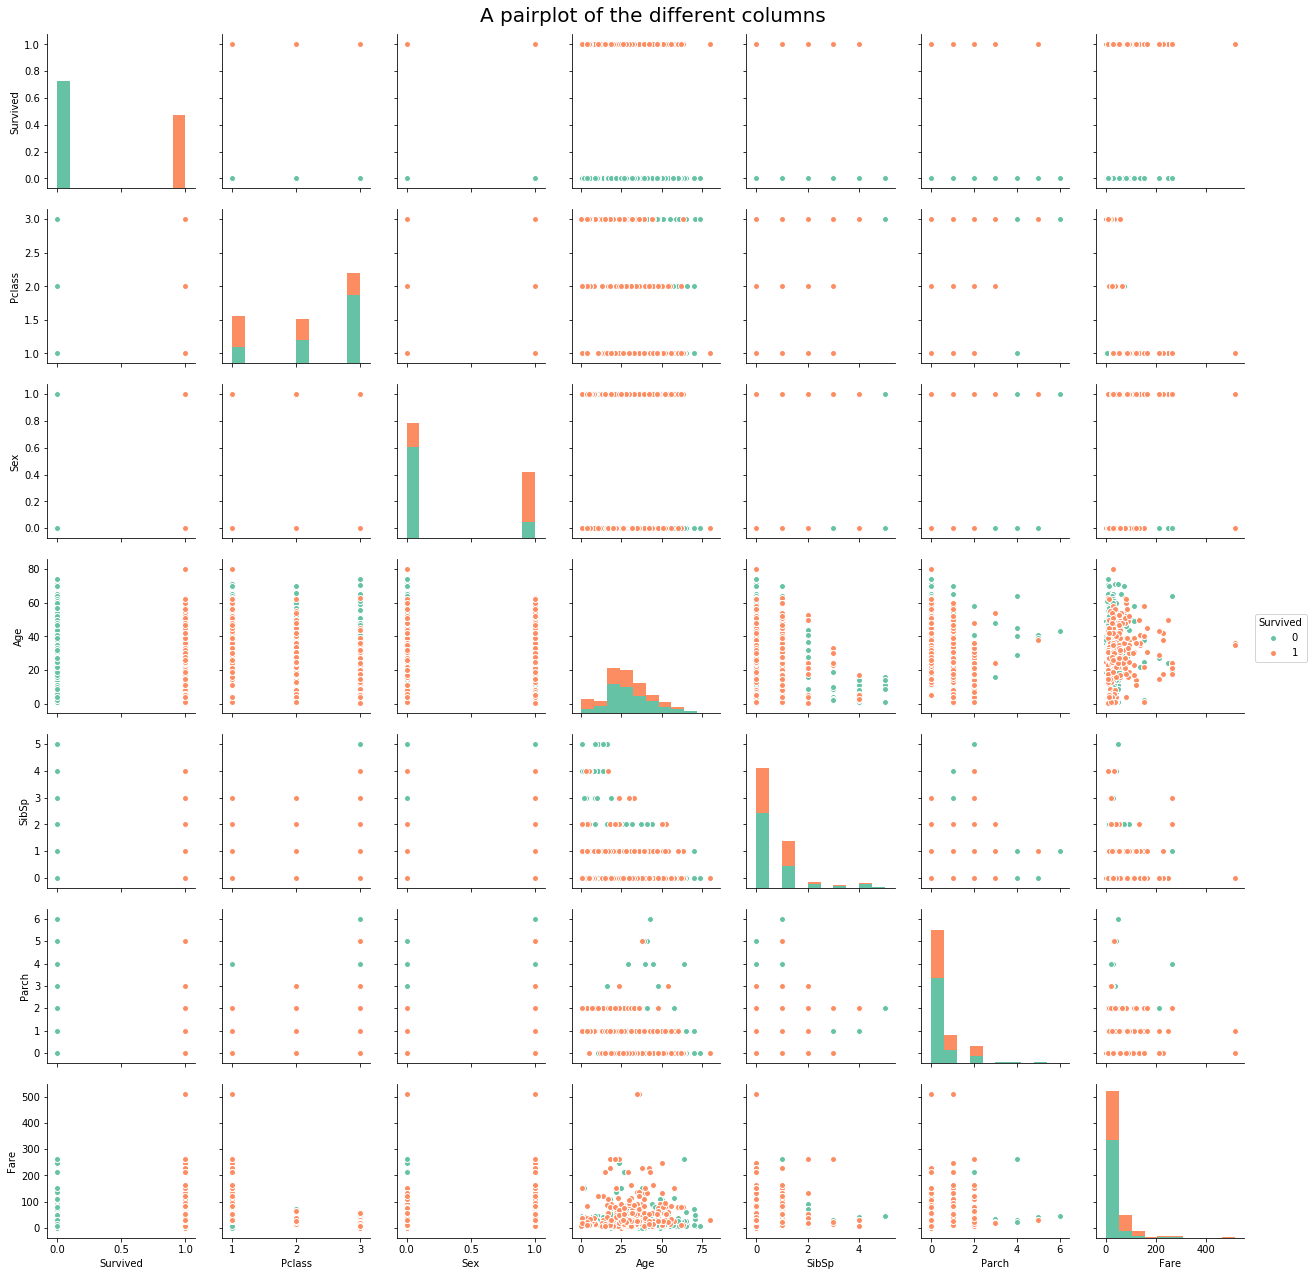

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's visualize the variables and differentiate them based on survival
%matplotlib inline
sns.pairplot(df, hue="Survived", palette="Set2")

plt.suptitle(
    "A pairplot of the different columns", 
    y=1.01,  # Adjust the position of the title vertically
    size=20  # Increase the size of the title to make it more visible
)

In [7]:
# First let's get the labels and features separated
y = df['Survived']
x = df.drop(columns='Survived')

# Reduce the memory usage and clean out df
df = None

# Let's look at our features and their correlations
# Create correlation matrix for just Features to determine different models to test
corr_matrix = x.corr().abs().round(2)

corr_matrix.style.background_gradient(cmap='Blues')

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1,0.16,0.37,0.07,0.03,0.55
Sex,0.16,1,0.09,0.1,0.25,0.18
Age,0.37,0.09,1,0.31,0.19,0.1
SibSp,0.07,0.1,0.31,1,0.38,0.14
Parch,0.03,0.25,0.19,0.38,1,0.21
Fare,0.55,0.18,0.1,0.14,0.21,1


In [8]:
from sklearn.model_selection import train_test_split
import os

# Split the data into a training and testing data sets in the ratio 4:1
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)


# Finally split the training data set further into a training and validation
# data sets in the ratio 4:1 
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

# Clean x and y
x = y = None

def make_csv(x, y, filename, data_dir):
    '''
        Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
    '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    
    df = pd.concat([y, x], axis=1)
    df.to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [12]:
# Data directory
data_dir = 'titanic_data'

make_csv(X_train, Y_train, filename='train.csv', data_dir=data_dir)
make_csv(X_val, Y_val, filename='validation.csv', data_dir=data_dir)
make_csv(X_test, Y_test, filename='test.csv', data_dir=data_dir)

Path created: titanic_data/train.csv
Path created: titanic_data/validation.csv
Path created: titanic_data/test.csv


In [13]:
# sagemaker
import boto3
import sagemaker
from sagemaker import get_execution_role

In [14]:
# SageMaker session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# default S3 bucket
bucket = sagemaker_session.default_bucket()

In [16]:
# upload data sets to s3
prefix = 'udacity-capstone-kaggle'

test_location = sagemaker_session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = sagemaker_session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = sagemaker_session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

# iterate through S3 objects and print contents
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
     print(obj.key)

udacity-capstone-kaggle/test.csv
udacity-capstone-kaggle/train.csv
udacity-capstone-kaggle/validation.csv


In [36]:
import numpy as np

# code to evaluate the endpoint on test data
# returns a variety of model metrics
def evaluate(test_preds, test_labels, verbose=True):
    """
    Evaluate a model on a test set given the predictions.  
    Return binary classification metrics.
    :param test_preds: The predicted values
    :param test_labels: Class labels for test data
    :param verbose: If True, prints a table of all performance metrics
    :return: A dictionary of performance metrics.
    """
    
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # print metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['actuals'], colnames=['predictions']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print()
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

In [23]:
from sklearn import tree

# Generate our base statistical model
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, Y_train)

In [37]:
tree_metrics = evaluate(clf.predict(X_test), Y_test, True)

predictions   0   1
actuals            
0            78  15
1            13  37

Recall:     0.740
Precision:  0.712
Accuracy:   0.804



In [25]:
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(sagemaker_session.boto_region_name, 'xgboost', '0.90-1')

xgb = sagemaker.estimator.Estimator(container, # The location of the container we wish to use
                                    role,                                    # What is our current IAM Role
                                    train_instance_count=1,                  # How many compute instances
                                    train_instance_type='ml.m4.xlarge',      # What kind of compute instances
                                    output_path=f's3://{bucket}/{prefix}/xgb-output',
                                    sagemaker_session=sagemaker_session)

xgb.set_hyperparameters(max_depth=10,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='binary:logistic',
                        early_stopping_rounds=10,
                        num_round=500)

In [26]:
%%time

# Train the xgb estimator on S3 training data
xgb.fit({
    'train': sagemaker.s3_input(s3_data=train_location, content_type='csv'),
    'validation': sagemaker.s3_input(s3_data=val_location, content_type='csv')
})

2020-03-31 12:36:28 Starting - Starting the training job...
2020-03-31 12:36:29 Starting - Launching requested ML instances......
2020-03-31 12:37:33 Starting - Preparing the instances for training...
2020-03-31 12:38:28 Downloading - Downloading input data...
2020-03-31 12:38:54 Training - Downloading the training image...
2020-03-31 12:39:23 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[12:39:20] 456x6 matrix with 2736 entries loaded from /opt/ml/input/data/train?format=cs

In [27]:
# Look at the PyTorch model we will use
!pygmentize source_pytorch/model.py

# torch imports
import torch.nn.functional as F
import torch.nn as nn

class BinaryClassifier(nn.Module):
    """
    Define a neural network that performs binary classification.
    The network should accept your number of features as input, and produce 
    a single sigmoid value, that can be rounded to a label: 0 or 1, as output.
    
    Notes on training:
    To train a binary classifier in PyTorch, use BCELoss.
    BCELoss is binary cross entropy loss, documentation: https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss
    """
    def __init__(self, input_features, hidden_dim, output_dim):
        """
        Initialize the model by setting up linear layers.
        Use the input parameters to help define the layers of your model.
        :param input_features: the number of input features in your training/test data
        :param hidden_dim: helps define the number of nodes in the hidden layer(s)
        :param output_dim: the number of outputs you want to produce
        ""

In [28]:
# Load PyTorch training script
!pygmentize source_pytorch/train.py

import argparse
import json
import os
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data

# imports the model in model.py by name
from model import BinaryClassifier

def model_fn(model_dir):
    """Load the PyTorch model from the `model_dir` directory."""
    print("Loading model.")

    # First, load the parameters used to create the model.
    model_info = {}
    model_info_path = os.path.join(model_dir, 'model_info.pth')
    with open(model_info_path, 'rb') as f:
        model_info = torch.load(f)

    print("model_info: {}".format(model_info))

    # Determine the device and construct the model.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BinaryClassifier(model_info['input_features'], model_info['hidden_dim'], model_info['output_dim'])

    # Load the stored model parameters.
    model_path = os.path.join(model_dir, 'model.pth')
    with open(model_path, 'rb') as f:
        model.load_state_dict(torch.load(

In [29]:
# Load PyTorch predict script
!pygmentize source_pytorch/predict.py

# import libraries
import os
import numpy as np
import torch
from six import BytesIO

# import model from model.py, by name
from model import BinaryClassifier

# default content type is numpy array
NP_CONTENT_TYPE = 'application/x-npy'


# Provided model load function
def model_fn(model_dir):
    """Load the PyTorch model from the `model_dir` directory."""
    print("Loading model.")

    # First, load the parameters used to create the model.
    model_info = {}
    model_info_path = os.path.join(model_dir, 'model_info.pth')
    with open(model_info_path, 'rb') as f:
        model_info = torch.load(f)

    print("model_info: {}".format(model_info))

    # Determine the device and construct the model.
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BinaryClassifier(model_info['input_features'], model_info['hidden_dim'], model_info['output_dim'])

    # Load the store model parameters.
    model_path = os.path.join(model_dir, 'model.pth')
    with op

In [30]:
from sagemaker.pytorch import PyTorch

pytorch_estimator = PyTorch(
    entry_point='train.py',
    source_dir='source_pytorch',
    role=role,
    sagemaker_session=sagemaker_session,
    train_instance_count=1,
    train_instance_type='ml.c4.xlarge',
    output_path=f's3://{bucket}/{prefix}/pytorch-output',
    hyperparameters={
        "input_features": 6,
        "hidden_dim": 30,
        "output_dim": 1,
        "epochs": 250
    },
    framework_version='1.4.0'
)

In [31]:
%%time

# Train the PyTorch estimator on S3 training data
pytorch_estimator.fit({
    'train': train_location,
    'validation': val_location
})

2020-03-31 12:58:30 Starting - Starting the training job...
2020-03-31 12:58:31 Starting - Launching requested ML instances......
2020-03-31 12:59:35 Starting - Preparing the instances for training...
2020-03-31 13:00:24 Downloading - Downloading input data......
2020-03-31 13:01:16 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-03-31 13:01:37,405 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-03-31 13:01:37,408 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-03-31 13:01:37,419 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-03-31 13:01:37,420 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-03-31 13:01:37,715 sagemaker-containers INFO     Module default_user_module_name does not provide a setup.py. 
Generating setup.py
2

In [79]:
%%time

# deploy the xgb model to create a predictor
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

---------------!CPU times: user 266 ms, sys: 17.2 ms, total: 283 ms
Wall time: 7min 32s


In [34]:
%%time

from sagemaker.pytorch import PyTorchModel

pytorch_model = PyTorchModel(
    model_data=pytorch_estimator.model_data,
    entry_point='predict.py',
    source_dir='source_pytorch',
    role=role,
    sagemaker_session=sagemaker_session,
    framework_version='1.4.0'
)

# deploy the PyTorch model to create a predictor
pytorch_predictor = pytorch_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium'
)

-----------------!CPU times: user 386 ms, sys: 25 ms, total: 411 ms
Wall time: 8min 32s


In [44]:
from sagemaker.predictor import csv_serializer

# We need to tell the endpoint what format the data we are sending is in
xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer

# First: generate predicted, class labels
xgb_test_y_preds = np.fromstring(
    xgb_predictor.predict(X_test.values).decode('utf-8'),
    sep=','
)

xgb_test_y_preds = np.squeeze(
    np.round(xgb_test_y_preds)
)

xgb_metrics = evaluate(xgb_test_y_preds, Y_test, True)

predictions  0.0  1.0
actuals              
0             91    2
1             25   25

Recall:     0.500
Precision:  0.926
Accuracy:   0.811



In [46]:
pytorch_test_y_preds = np.squeeze(
    np.round(pytorch_predictor.predict(X_test))
)

pytorch_metrics = evaluate(pytorch_test_y_preds, Y_test, True)

predictions  0.0  1.0
actuals              
0             87    6
1             15   35

Recall:     0.700
Precision:  0.854
Accuracy:   0.853



In [143]:
# Accepts a predictor endpoint as input
# And deletes the endpoint by name
def delete_endpoint(predictor):
    try:
        boto3.client('sagemaker').delete_endpoint(EndpointName=predictor.endpoint)
        print('Deleted {}'.format(predictor.endpoint))
    except:
        print('Already deleted: {}'.format(predictor.endpoint))

        
# Since The PyTorch model performs better we can delete the XGB endpoint and use the 
# the PyTorch model in our web app
delete_endpoint(xgb_predictor)

Deleted sagemaker-xgboost-2020-03-31-12-36-28-428


In [48]:
pytorch_predictor.endpoint # Get the predictor's endpoint to use in the Lambda function

'pytorch-inference-2020-03-31-14-47-33-571'

In [144]:
# Delete the PyTorch endpoint after using the API
delete_endpoint(pytorch_predictor)

Deleted pytorch-inference-2020-03-31-14-47-33-571


The lambda_function.py

```python
import numpy as np
import json
from six import BytesIO

# We need to use the low-level library to interact with SageMaker since the SageMaker API
# is not available natively through Lambda.
import boto3

ENDPOINT_NAME = 'pytorch-inference-2020-03-31-14-47-33-571'

def lambda_handler(event, context):

    # The SageMaker runtime is what allows us to invoke the endpoint that we've created.
    runtime = boto3.Session().client('sagemaker-runtime')

    payload = event['body']
    print(payload)

    payload = [float(d) for d in payload.split(',')]
    d = np.array(payload)

    np.save('/tmp/data', d)

    response=""
    with open('/tmp/data.npy', 'rb') as data:
        response = runtime.invoke_endpoint(
            EndpointName = ENDPOINT_NAME,     # The name of the endpoint we created
            ContentType = 'application/x-npy',                     # The data format that is expected
            Accept='application/x-npy',
            Body = data,
    )
    
    output = response['Body'].read()
    
    # The response is an HTTP response whose body contains the result of our inference
    result = np.load(BytesIO(output))[0]

    return {
        'statusCode' : 200,
        'headers' : { 'Content-Type' : 'text/plain', 'Access-Control-Allow-Origin' : '*' },
        'body' : str(result)
    }
```

In [146]:
%%time

pytorch_estimator_2 = PyTorch(
    entry_point='train.py',
    source_dir='source_pytorch',
    role=role,
    sagemaker_session=sagemaker_session,
    train_instance_count=1,
    train_instance_type='ml.c4.xlarge',
    output_path=f's3://{bucket}/{prefix}/pytorch2-output',
    hyperparameters={
        "input_features": 6,
        "hidden_dim": 20,
        "output_dim": 1,
        "epochs": 300
    },
    framework_version='1.4.0'
)


# Training a second PyTorch estimator on S3 training data
pytorch_estimator_2.fit({
    'train': train_location,
    'validation': val_location
})

2020-03-31 19:45:04 Starting - Starting the training job...
2020-03-31 19:45:07 Starting - Launching requested ML instances.........
2020-03-31 19:46:41 Starting - Preparing the instances for training...
2020-03-31 19:47:29 Downloading - Downloading input data......
2020-03-31 19:48:33 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-03-31 19:48:34,693 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-03-31 19:48:34,696 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2020-03-31 19:48:34,707 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-03-31 19:48:37,774 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-03-31 19:48:38,046 sagemaker-containers INFO     Module default_user_module_name does not provide a setu

In [147]:
%%time

from sagemaker.pytorch import PyTorchModel

pytorch_model_2 = PyTorchModel(
    model_data=pytorch_estimator_2.model_data,
    entry_point='predict.py',
    source_dir='source_pytorch',
    role=role,
    sagemaker_session=sagemaker_session,
    framework_version='1.4.0'
)

# deploy the PyTorch model to create a predictor
pytorch_predictor_2 = pytorch_model_2.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium'
)

---------------!CPU times: user 317 ms, sys: 21.7 ms, total: 339 ms
Wall time: 7min 32s


In [149]:
pytorch_test_y_preds_2 = np.squeeze(
    np.round(pytorch_predictor_2.predict(X_test))
)

pytorch_metrics_2 = evaluate(pytorch_test_y_preds_2, Y_test, True)

predictions  0.0  1.0
actuals              
0             85    8
1             14   36

Recall:     0.720
Precision:  0.818
Accuracy:   0.846



In [153]:
delete_endpoint(pytorch_predictor_2)

Deleted pytorch-inference-2020-03-31-19-52-50-046


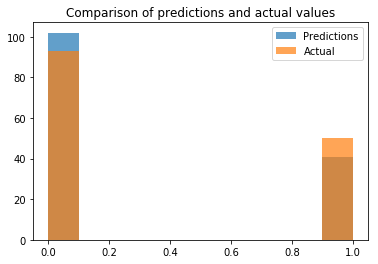

In [166]:
plt.hist(pytorch_test_y_preds, alpha=0.7, label="Predictions")
plt.hist(Y_test, alpha=0.7, label="Actual")
plt.title("Comparison of predictions and actual values")
plt.legend()

In [167]:
# Data cleanup
# deleting bucket, uncomment lines below

bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

[{'ResponseMetadata': {'RequestId': '7EB209362004BB0C',
   'HostId': 'XPm1XNvJz4C0B4K2+uavnXYRjAOj94mHWy7bBHIHbAKxyReUjukvv3KVQ0SReVjzzh5cja+sNqI=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': 'XPm1XNvJz4C0B4K2+uavnXYRjAOj94mHWy7bBHIHbAKxyReUjukvv3KVQ0SReVjzzh5cja+sNqI=',
    'x-amz-request-id': '7EB209362004BB0C',
    'date': 'Tue, 31 Mar 2020 21:35:37 GMT',
    'connection': 'close',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'udacity-capstone-kaggle/pytorch2-output/pytorch-training-2020-03-31-19-45-04-470/debug-output/events/000000000500/000000000500_worker_0.tfevents'},
   {'Key': 'udacity-capstone-kaggle/pytorch2-output/pytorch-training-2020-03-31-19-45-04-470/debug-output/index/000000007/000000007500_worker_0.json'},
   {'Key': 'udacity-capstone-kaggle/pytorch2-output/pytorch-training-2020-03-31-19-45-04-470/debug-output/training_job_end.ts'},
   {'Key': 'udacit